In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

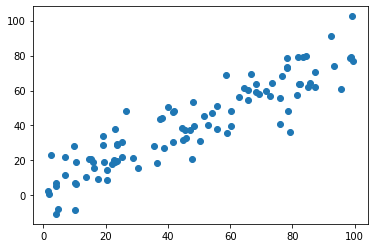

In [18]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### demean

In [19]:
def demean(X):
    return X - np.mean(X,axis=0)

In [20]:
X_demean = demean(X)

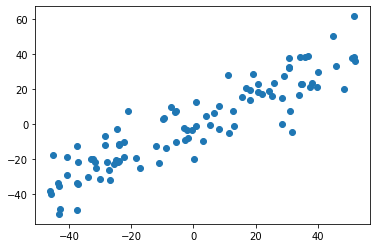

In [21]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

### 梯度上升法

In [22]:
def f(w,X):
    return np.sum((X.dot(w))**2)/len(X)

In [23]:
def df_math(w,X):
    return X.T.dot(X.dot(w))*2/len(X)

In [24]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [25]:
def direction(w):
    return w /np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient  = df(w, X)
        last_w = w 
        w = w + eta * gradient
        w = direction(w) # 注意1 每次求单位向量
        if (abs(f(w,X) - f(last_w,X))<epsilon):
            break
        
        cur_iter += 1
    return w


In [26]:
initial_w = np.random.random(X.shape[1]) # 注意2 初始位置不能为0

In [27]:
initial_w

array([0.64157042, 0.12180844])

In [28]:
eta = 0.001

In [29]:
# 注意3 不能使用StandardScaler 进行归一化，因为 StandardScaler 使样本方差为1

In [30]:
gradient_ascent(df_debug,X_demean,initial_w,eta)

array([0.77103825, 0.63678883])

In [37]:
w = gradient_ascent(df_math,X_demean,initial_w,eta)

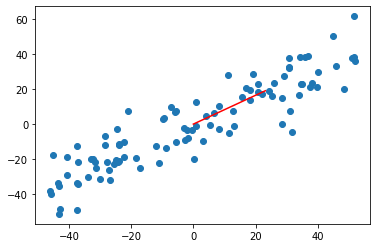

In [39]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],color="r")
plt.show()

### 使用极端数据

In [40]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

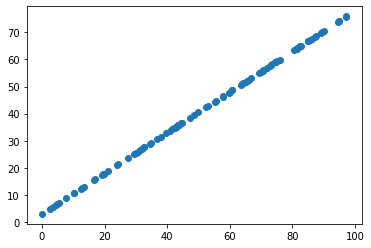

In [41]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [42]:
X2_demean = demean(X2)

In [45]:
w2 = gradient_ascent(df_math,X2_demean,initial_w,eta)

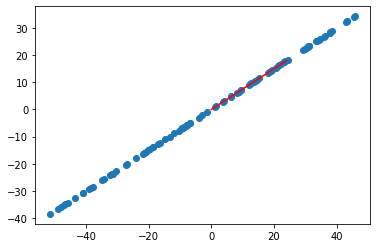

In [46]:
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0,w2[0]*30],[0,w2[1]*30],color="r")
plt.show()